In [ ]:
import kagglehub
import os
import shutil
!pip install split-folders -q
!pip install ultralytics -q
import splitfolders
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralyt

# Download the Dataset & Copy Files to Desired Destination

In [ ]:
# Download latest version
path = kagglehub.dataset_download("a2015003713/militaryaircraftdetectiondataset")

print("Path to dataset files:", path)

100%|██████████| 10.1G/10.1G [01:37<00:00, 112MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/a2015003713/militaryaircraftdetectiondataset/versions/90


In [ ]:
source_dir = f'{path}/crop/'
destination_dir = '/content/dataset/'
subfolders_to_copy = ['F15', 'F16', 'F18', 'F22', 'F35', 'B1', 'B2', 'C17', 'C130']

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy each specified subfolder
for folder in subfolders_to_copy:
    source_path = os.path.join(source_dir, folder)
    destination_path = os.path.join(destination_dir, folder)
    if os.path.exists(source_path):
        shutil.copytree(source_path, destination_path)
        print(f"Copied {folder} to {destination_dir}")
    else:
        print(f"Source folder {folder} not found in {source_dir}")
        raise FileNotFoundError

print("Copying complete.")

Copied F15 to /content/dataset/
Copied F16 to /content/dataset/
Copied F18 to /content/dataset/
Copied F22 to /content/dataset/
Copied F35 to /content/dataset/
Copied B1 to /content/dataset/
Copied B2 to /content/dataset/
Copied C17 to /content/dataset/
Copied C130 to /content/dataset/
Copying complete.


# Label Files & Transfer Images to a Single Folder

In [ ]:
aircrafts = ["F15", "F16", "F18", "F22", "F35", "B1", "B2", "C17", "C130"]
image_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".webp"}

for i, aircraft in enumerate(aircrafts):

  image_directory = f"/content/dataset/{aircraft}"
  label_directory = "/content/dataset/labels"
  CLASS_ID = i

  os.makedirs(label_directory, exist_ok=True)

  yolo_label_content = f"{CLASS_ID} 0.5 0.5 1.0 1.0"

  print(f"▶️ Reading images from: {image_directory}")
  print("-" * 30)

  if not os.path.isdir(image_directory):
      continue
  else:
      for filename in os.listdir(image_directory):
          if os.path.splitext(filename)[1].lower() in image_extensions:
              label_filename = os.path.splitext(filename)[0] + ".txt"
              label_filepath = os.path.join(label_directory, label_filename)
              try:
                  with open(label_filepath, 'w') as f:
                      f.write(yolo_label_content)
              except IOError as e:
                  print(f"❌ Error creating label for {filename}: {e}")

▶️ Reading images from: /content/dataset/F15
------------------------------
▶️ Reading images from: /content/dataset/F16
------------------------------
▶️ Reading images from: /content/dataset/F18
------------------------------
▶️ Reading images from: /content/dataset/F22
------------------------------
▶️ Reading images from: /content/dataset/F35
------------------------------
▶️ Reading images from: /content/dataset/B1
------------------------------
▶️ Reading images from: /content/dataset/B2
------------------------------
▶️ Reading images from: /content/dataset/C17
------------------------------
▶️ Reading images from: /content/dataset/C130
------------------------------


In [ ]:
# Create the destination directory for all images if it doesn't exist
all_images_destination_dir = '/content/dataset/images/'
os.makedirs(all_images_destination_dir, exist_ok=True)


print("Starting image transfer to a single folder...")
for aircraft in aircrafts:
    source_image_directory = f"/content/dataset/{aircraft}"
    print(f"Processing images from: {source_image_directory}")
    if os.path.isdir(source_image_directory):
        for filename in os.listdir(source_image_directory):
            if os.path.splitext(filename)[1].lower() in image_extensions:
                source_filepath = os.path.join(source_image_directory, filename)
                destination_filepath = os.path.join(all_images_destination_dir, filename)
                try:
                    # Use shutil.move to move the file
                    shutil.move(source_filepath, destination_filepath)
                    # print(f"Moved {filename} to {all_images_destination_dir}")
                except IOError as e:
                    print(f"❌ Error moving {filename}: {e}")
    else:
        print(f"Source directory not found: {source_image_directory}")

print("Image transfer complete.")

Starting image transfer to a single folder...
Processing images from: /content/dataset/F15
Processing images from: /content/dataset/F16
Processing images from: /content/dataset/F18
Processing images from: /content/dataset/F22
Processing images from: /content/dataset/F35
Processing images from: /content/dataset/B1
Processing images from: /content/dataset/B2
Processing images from: /content/dataset/C17
Processing images from: /content/dataset/C130
Image transfer complete.


In [ ]:
for aircraft in aircrafts:
    folder_path = f"/content/dataset/{aircraft}"
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        shutil.rmtree(folder_path)
        print(f"Deleted folder: {folder_path}")
    else:
        print(f"Folder not found or not a directory: {folder_path}")

Deleted folder: /content/dataset/F15
Deleted folder: /content/dataset/F16
Deleted folder: /content/dataset/F18
Deleted folder: /content/dataset/F22
Deleted folder: /content/dataset/F35
Deleted folder: /content/dataset/B1
Deleted folder: /content/dataset/B2
Deleted folder: /content/dataset/C17
Deleted folder: /content/dataset/C130


# Preparing the Dataset

In [ ]:
input_folder = '/content/dataset/'

output_folder = '/content/split/'

splitfolders.ratio(input_folder,
                   output=output_folder,
                   seed=42,
                   ratio=(.8, .2),
                   group_prefix=None,
                   move=False) # Set to True to move files instead of copying

print("Dataset splitting complete!")

Copying files: 21024 files [00:09, 2201.20 files/s]


Dataset splitting complete!


Create this dataset.yaml:

train: /content/split/train/images

val: /content/split/val/images

nc: 9

names: ["F15", "F16", "F18", "F22", "F35", "B1", "B2", "C17", "C130"]

# Fine-Tune the Model

## Test Run

In [ ]:
model = YOLO('yolov8n.pt')
dataset_yaml = '/content/dataset.yaml'

try:
    results = model.train(
        data=dataset_yaml,
        epochs=3,
        imgsz=640,
        batch=8,
        save=False,
        plots=False
    )
except Exception as e:
    print(f"An error occurred during training: {e}")

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=False, pose=12.0, pretrained=True, 

train: Scanning /content/split/train/labels.cache... 8389 images, 0 backgrounds, 20 corrupt: 100%|██████████| 8409/8409 [00:00<?, ?it/s]

train: /content/split/train/images/24ccde194acc7ed186a529293d7cbbff_0.jpg: ignoring corrupt image/label: image size (8, 44) <10 pixels
train: /content/split/train/images/2957729725f0acb08acb86af5e28c5f3_0.jpg: ignoring corrupt image/label: image size (9, 20) <10 pixels
train: /content/split/train/images/3e8e9b33cae546f9cd705b04beb19b86_0.jpg: ignoring corrupt image/label: image size (9, 43) <10 pixels
train: /content/split/train/images/3e8e9b33cae546f9cd705b04beb19b86_1.jpg: ignoring corrupt image/label: image size (9, 44) <10 pixels
train: /content/split/train/images/3e8e9b33cae546f9cd705b04beb19b86_2.jpg: ignoring corrupt image/label: image size (9, 45) <10 pixels
train: /content/split/train/images/667c0ef346281ede2835ea97ad258763_0.jpg: ignoring corrupt image/label: image size (9, 23) <10 pixels
train: /content/split/train/images/70aa0d4a87c0ebb34eabd8f4708b0c43_2.jpg: ignoring corrupt image/label: image size (8, 22) <10 pixels
train: /content/split/train/images/8a0b8bad3da60ee3b07c

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 850.4±450.3 MB/s, size: 441.0 KB)


val: Scanning /content/split/val/labels.cache... 2097 images, 0 backgrounds, 6 corrupt: 100%|██████████| 2103/2103 [00:00<?, ?it/s]

val: /content/split/val/images/20119511433f4033037247136d240dbf_1.jpg: ignoring corrupt image/label: image size (9, 54) <10 pixels
val: /content/split/val/images/6a1b57b5b62156b5414506f4ff596ab2_0.jpg: ignoring corrupt image/label: image size (9, 28) <10 pixels
val: /content/split/val/images/815e60ecc084056ab212cb7e9fd0a8da_0.jpg: ignoring corrupt image/label: image size (6, 37) <10 pixels
val: /content/split/val/images/c164910ed50eec7ce90fe34c353157d9_0.jpg: ignoring corrupt image/label: image size (8, 13) <10 pixels
val: /content/split/val/images/f31ec6705c27e98c716ce6c68d44ca76_1.jpg: ignoring corrupt image/label: image size (9, 30) <10 pixels
val: /content/split/val/images/fcd67777ad3fff3b8ecc07d81a387eb2_0.jpg: ignoring corrupt image/label: image size (8, 21) <10 pixels


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      1.11G     0.1875      2.237     0.9224         16        640: 100%|██████████| 1049/1049 [03:02<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 132/132 [00:20<00:00,  6.46it/s]


                   all       2097       2097      0.318      0.527      0.369      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      1.75G     0.1271      1.623     0.8849         19        640: 100%|██████████| 1049/1049 [02:55<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 132/132 [00:16<00:00,  7.93it/s]

                   all       2097       2097      0.366      0.605      0.473      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        3/3      1.75G      0.098       1.41     0.8719         16        640: 100%|██████████| 1049/1049 [02:54<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 132/132 [00:17<00:00,  7.65it/s]

                   all       2097       2097       0.57      0.637      0.651      0.648



3 epochs completed in 0.163 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 132/132 [00:15<00:00,  8.42it/s]


                   all       2097       2097      0.569      0.638      0.651      0.648
                   F15        325        325      0.437      0.455      0.474      0.474
                   F16        375        375      0.492      0.828       0.68       0.68
                   F18        318        318      0.452      0.673      0.641      0.639
                   F22        143        143      0.437      0.455      0.434      0.431
                   F35        265        265      0.551      0.502      0.592      0.591
                    B1        128        128      0.509      0.609      0.642       0.64
                    B2        106        106      0.884      0.649      0.802        0.8
                   C17        125        125      0.506      0.744      0.691      0.675
                  C130        312        312      0.851      0.827      0.904      0.904
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 2.1ms postprocess per image


## Hyperparameter Tuning

In [ ]:
model = YOLO('yolov8n.pt')

dataset_yaml = '/content/dataset.yaml'

# Start the automated hyperparameter tuning
results = model.tune(
    data=dataset_yaml,
    epochs=5,
    imgsz=640,
    iterations=5,
    optimizer='AdamW',
    plots=False,
    save=False,
    val=False
)

print("Tuning finished!")
print("Best hyperparameters saved in the 'runs' directory.")

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune2'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/5 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'cutmix': 0.0, 'copy_paste': 0.0}
Saved runs/detect/tune2/tune_scatter_plots.png
Saved runs/detect/tune2/tune_fitness.png

Tuner: 1/5 iterations complete ✅ (823.38s)
Tuner: Results saved to runs/detect/tune2
Tuner: Best fitness=0.20721 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.13139, 'metrics/recall(B)': 0.82557, 'metrics/mAP50(B)': 0.20733, 'metrics/mAP50-95(B)': 0.2072, 'val/box_loss': 0.14731, '

## Training the model with optimized hyper parameters

In [ ]:
best_hyp_yaml = '/content/runs/detect/tune2/best_hyperparameters.yaml'

results = model.train(
    data=dataset_yaml,
    cfg=best_hyp_yaml,
    epochs=20,
    imgsz=640,
    batch=16
)

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=/content/runs/detect/tune2/best_hyperparameters.yaml, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspect

train: Scanning /content/split/train/labels.cache... 8389 images, 0 backgrounds, 20 corrupt: 100%|██████████| 8409/8409 [00:00<?, ?it/s]

train: /content/split/train/images/24ccde194acc7ed186a529293d7cbbff_0.jpg: ignoring corrupt image/label: image size (8, 44) <10 pixels
train: /content/split/train/images/2957729725f0acb08acb86af5e28c5f3_0.jpg: ignoring corrupt image/label: image size (9, 20) <10 pixels
train: /content/split/train/images/3e8e9b33cae546f9cd705b04beb19b86_0.jpg: ignoring corrupt image/label: image size (9, 43) <10 pixels
train: /content/split/train/images/3e8e9b33cae546f9cd705b04beb19b86_1.jpg: ignoring corrupt image/label: image size (9, 44) <10 pixels
train: /content/split/train/images/3e8e9b33cae546f9cd705b04beb19b86_2.jpg: ignoring corrupt image/label: image size (9, 45) <10 pixels
train: /content/split/train/images/667c0ef346281ede2835ea97ad258763_0.jpg: ignoring corrupt image/label: image size (9, 23) <10 pixels
train: /content/split/train/images/70aa0d4a87c0ebb34eabd8f4708b0c43_2.jpg: ignoring corrupt image/label: image size (8, 22) <10 pixels
train: /content/split/train/images/8a0b8bad3da60ee3b07c

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 383.3±277.1 MB/s, size: 441.0 KB)


val: Scanning /content/split/val/labels.cache... 2097 images, 0 backgrounds, 6 corrupt: 100%|██████████| 2103/2103 [00:00<?, ?it/s]

val: /content/split/val/images/20119511433f4033037247136d240dbf_1.jpg: ignoring corrupt image/label: image size (9, 54) <10 pixels
val: /content/split/val/images/6a1b57b5b62156b5414506f4ff596ab2_0.jpg: ignoring corrupt image/label: image size (9, 28) <10 pixels
val: /content/split/val/images/815e60ecc084056ab212cb7e9fd0a8da_0.jpg: ignoring corrupt image/label: image size (6, 37) <10 pixels
val: /content/split/val/images/c164910ed50eec7ce90fe34c353157d9_0.jpg: ignoring corrupt image/label: image size (8, 13) <10 pixels
val: /content/split/val/images/f31ec6705c27e98c716ce6c68d44ca76_1.jpg: ignoring corrupt image/label: image size (9, 30) <10 pixels
val: /content/split/val/images/fcd67777ad3fff3b8ecc07d81a387eb2_0.jpg: ignoring corrupt image/label: image size (8, 21) <10 pixels


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train8
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.06G     0.1802      2.306     0.9217         16        640: 100%|██████████| 525/525 [02:35<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:19<00:00,  3.38it/s]


                   all       2097       2097      0.391      0.521      0.421      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.35G     0.1355       1.63      0.884         19        640: 100%|██████████| 525/525 [02:31<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:16<00:00,  3.97it/s]


                   all       2097       2097       0.31      0.643      0.419      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.35G     0.1313       1.47     0.8795         16        640: 100%|██████████| 525/525 [02:30<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:15<00:00,  4.16it/s]

                   all       2097       2097      0.492      0.553      0.528      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.35G     0.1196      1.351     0.8746         16        640: 100%|██████████| 525/525 [02:31<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:17<00:00,  3.80it/s]

                   all       2097       2097      0.522      0.567      0.597      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.35G      0.107      1.248     0.8708         14        640: 100%|██████████| 525/525 [02:29<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:15<00:00,  4.25it/s]

                   all       2097       2097      0.656       0.63      0.718      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.35G    0.09706      1.158     0.8677         13        640: 100%|██████████| 525/525 [02:33<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:16<00:00,  3.93it/s]

                   all       2097       2097      0.615      0.642      0.709      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.36G    0.08919      1.088     0.8645         16        640: 100%|██████████| 525/525 [02:29<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:16<00:00,  3.89it/s]

                   all       2097       2097      0.706      0.709      0.799      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.36G    0.08574      1.032     0.8662         16        640: 100%|██████████| 525/525 [02:29<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:17<00:00,  3.68it/s]

                   all       2097       2097      0.758      0.724      0.828      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.36G    0.08122     0.9679     0.8633         14        640: 100%|██████████| 525/525 [02:30<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:19<00:00,  3.38it/s]


                   all       2097       2097      0.765      0.707      0.825      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.36G    0.07828       0.93     0.8635         13        640: 100%|██████████| 525/525 [02:30<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:17<00:00,  3.87it/s]


                   all       2097       2097      0.796      0.734      0.858      0.856
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.36G    0.07738      0.735     0.8518          5        640: 100%|██████████| 525/525 [02:24<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:16<00:00,  3.88it/s]

                   all       2097       2097      0.818      0.724      0.859      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.37G    0.06591     0.6352      0.848          5        640: 100%|██████████| 525/525 [02:21<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:15<00:00,  4.29it/s]

                   all       2097       2097      0.853      0.761      0.884      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.38G     0.0591     0.5801     0.8454          5        640: 100%|██████████| 525/525 [02:24<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:15<00:00,  4.20it/s]

                   all       2097       2097      0.856      0.752      0.881      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       3.4G    0.05572     0.5176     0.8432          5        640: 100%|██████████| 525/525 [02:26<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:15<00:00,  4.29it/s]

                   all       2097       2097      0.871      0.787      0.906      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       3.4G    0.05098     0.4603     0.8413          5        640: 100%|██████████| 525/525 [02:23<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:15<00:00,  4.23it/s]

                   all       2097       2097      0.889      0.791      0.916      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       3.4G      0.048     0.4257     0.8392          5        640: 100%|██████████| 525/525 [02:26<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:17<00:00,  3.80it/s]

                   all       2097       2097      0.895      0.816       0.93       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       3.4G    0.04524     0.3685      0.838          5        640: 100%|██████████| 525/525 [02:24<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:15<00:00,  4.13it/s]

                   all       2097       2097      0.915      0.829      0.939      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20       3.4G    0.04168     0.3404     0.8385          5        640: 100%|██████████| 525/525 [02:25<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:16<00:00,  4.07it/s]

                   all       2097       2097      0.881      0.855      0.939      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       3.4G    0.03836      0.295      0.839          5        640: 100%|██████████| 525/525 [02:24<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:16<00:00,  3.98it/s]

                   all       2097       2097       0.92      0.849      0.949      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       3.4G    0.03488     0.2607     0.8388          5        640: 100%|██████████| 525/525 [02:25<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:16<00:00,  4.07it/s]

                   all       2097       2097      0.941      0.845      0.951       0.95



20 epochs completed in 0.918 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 6.2MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 66/66 [00:16<00:00,  4.02it/s]


                   all       2097       2097      0.937      0.846      0.951       0.95
                   F15        325        325      0.939      0.775      0.941      0.941
                   F16        375        375      0.912      0.837      0.953      0.953
                   F18        318        318      0.933      0.836      0.946      0.945
                   F22        143        143      0.965      0.706      0.905      0.905
                   F35        265        265      0.899       0.83      0.947      0.947
                    B1        128        128      0.951      0.875       0.95       0.95
                    B2        106        106      0.908      0.896      0.961      0.961
                   C17        125        125      0.947      0.912      0.967      0.967
                  C130        312        312      0.983      0.942      0.985      0.985
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect

## Testing on Custom Images

Error loading model: [Errno 2] No such file or directory: '/content/runs/detect/train/weights/best.pt'

image 1/1 /content/test_images/210125-D-IJ948-9720.jpg: 384x640 1 F22, 68.0ms
Speed: 3.3ms preprocess, 68.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


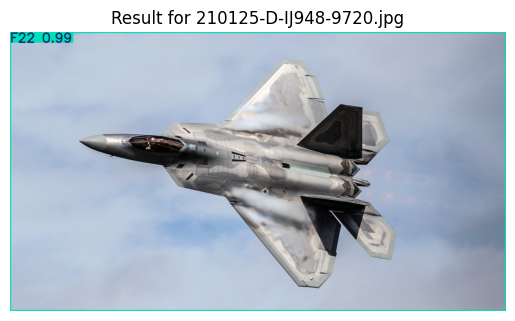

Processed 210125-D-IJ948-9720.jpg and saved result to /content/test_results/210125-D-IJ948-9720.jpg

image 1/1 /content/test_images/1200px-F-16_1.jpg: 448x640 1 F16, 70.1ms
Speed: 6.3ms preprocess, 70.1ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)


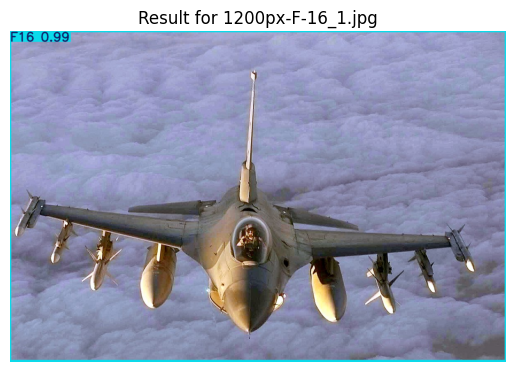

Processed 1200px-F-16_1.jpg and saved result to /content/test_results/1200px-F-16_1.jpg

image 1/1 /content/test_images/210125-D-IJ948-9719.jpg: 384x640 1 F16, 9.6ms
Speed: 3.5ms preprocess, 9.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


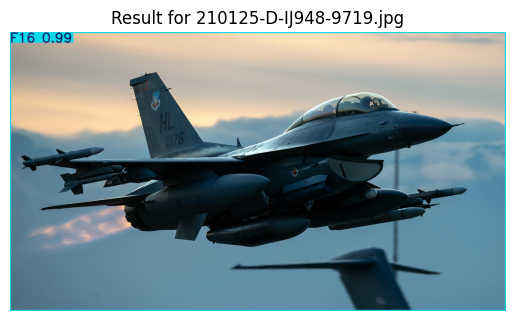

Processed 210125-D-IJ948-9719.jpg and saved result to /content/test_results/210125-D-IJ948-9719.jpg
✅ Inference complete.


In [ ]:
import cv2

# --- For displaying images in Colab/Jupyter ---
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
# Path to your custom-trained model weights
MODEL_PATH = '/content/runs/detect/train/weights/best.pt'

# Path to the folder containing your test images
IMAGE_FOLDER_PATH = '/content/test_images/'

# Path to the folder where you want to save the results
OUTPUT_FOLDER_PATH = '/content/test_results/'
# --- END CONFIGURATION ---

# Create the output folder if it doesn't exist
os.makedirs(OUTPUT_FOLDER_PATH, exist_ok=True)

# Load your custom-trained model
try:
    model = YOLO(MODEL_PATH)
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# Get a list of all image files in the folder
try:
    image_files = [f for f in os.listdir(IMAGE_FOLDER_PATH) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
except FileNotFoundError:
    print(f"Error: The directory '{IMAGE_FOLDER_PATH}' was not found.")
    exit()

# --- RUN PREDICTION, DISPLAY, AND SAVE RESULTS ---
for image_file in image_files:
    image_path = os.path.join(IMAGE_FOLDER_PATH, image_file)

    # Run inference on the image
    results = model(image_path)

    # The plot() method returns a BGR numpy array with the annotations
    annotated_image = results[0].plot()

    # --- Option 1: Displaying in a Google Colab / Jupyter Notebook ---
    # Convert the image from BGR (OpenCV's format) to RGB (matplotlib's format)
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    plt.imshow(annotated_image_rgb)
    plt.title(f'Result for {image_file}')
    plt.axis('off') # Hide the axes
    plt.show()

    # --- Option 2: Displaying in a local Python script ---
    # This will open a new window for each image. Press any key to close it.
    # cv2.imshow(f'Result for {image_file}', annotated_image)
    # cv2.waitKey(0) # Wait for a key press to continue to the next image
    # cv2.destroyWindow(f'Result for {image_file}') # Close the specific window

    # --- Save the annotated image ---
    output_path = os.path.join(OUTPUT_FOLDER_PATH, image_file)
    cv2.imwrite(output_path, annotated_image)
    print(f"Processed {image_file} and saved result to {output_path}")

# If using Option 2 (local script), uncomment the line below to close all OpenCV windows at the end
# cv2.destroyAllWindows()

print("✅ Inference complete.")

# Saving the Work

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This creates a project folder in your Drive and copies the runs folder into it
!mkdir -p /content/drive/MyDrive/YOLO_Aircraft_Project/
!cp -r /content/runs /content/drive/MyDrive/YOLO_Aircraft_Project/